In [4]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

import qiskit_aer
from qiskit_aer import AerSimulator

In [5]:
NUM_SHOTS = 10**4
NUM_QUBITS = 10


In [6]:
def circuit_ghz_4q_cnot0():
    circ = QuantumCircuit(4)
    circ.h(0)
    circ.cx(0,1)
    circ.cx(0,2)
    circ.cx(0,3)

    circ.measure_all()

    return circ
    
def custom_ghz(num_q: int, hammard_on: int, single_qubit_cnot=True):
    
    assert hammard_on < num_q, f"Qubit chosen to have hammard gate {hammard_on} greater than number of available qubits {num_q} "
    circ = QuantumCircuit(num_q)
    circ.h(hammard_on)
    if single_qubit_cnot:
        for i in range(num_q):
            if not i == hammard_on:
                circ.cx(hammard_on, i)

    else:
        for i in range(num_q-1):
            c = (hammard_on+i) % num_q
            t = (hammard_on+i+1) % num_q
            circ.cx(c,t)

    circ.measure_all()

    return circ




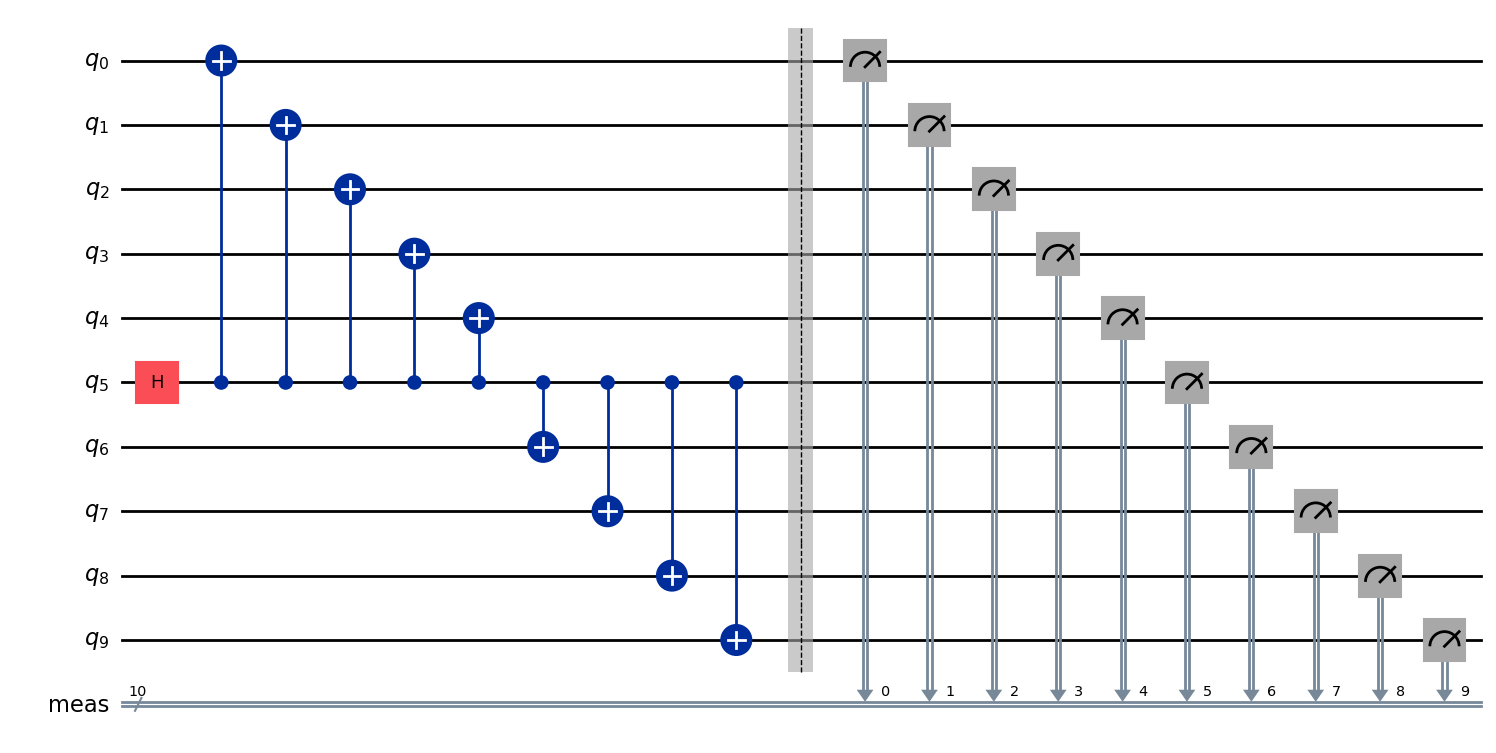

In [7]:
# circ = circuit_ghz_4q_cnot0()
circ = custom_ghz(num_q=NUM_QUBITS, hammard_on=NUM_QUBITS//2)
circ.draw('mpl')

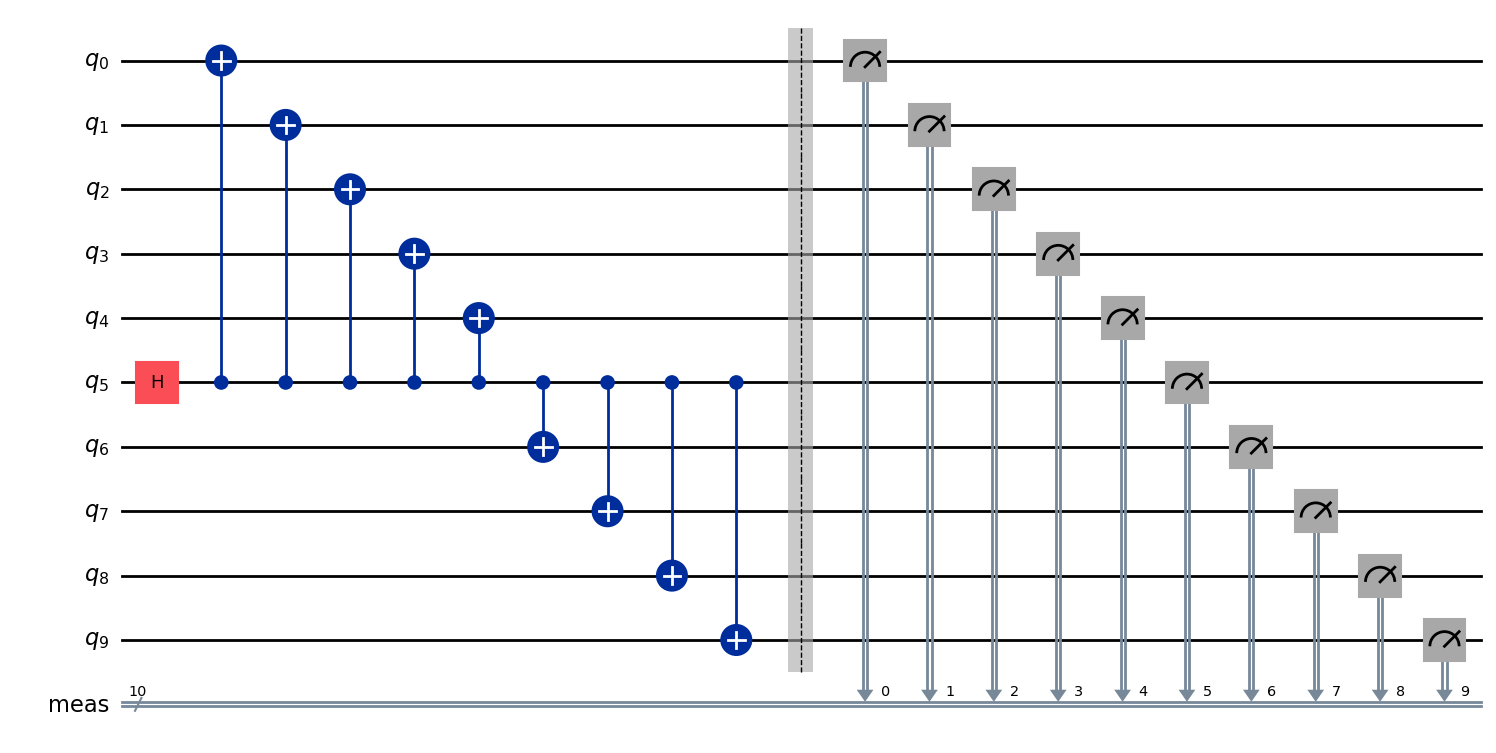

In [8]:
ideal_sim = AerSimulator()
transpiled_circ = transpile(circ, ideal_sim)
transpiled_circ.draw('mpl')

In [9]:
result = ideal_sim.run(transpiled_circ, shots=NUM_SHOTS).result()
result

Result(backend_name='aer_simulator', backend_version='0.17.0', qobj_id='', job_id='58fd0834-f9c7-46a1-a6f7-ce6213f6c05c', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3ff': 4986, '0x0': 5014}), header=QobjExperimentHeader(creg_sizes=[['meas', 10]], global_phase=0.0, memory_slots=10, n_qubits=10, name='circuit-162', qreg_sizes=[['q', 10]], metadata={}), status=DONE, seed_simulator=2276357021, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 14, 'parallel_shots': 1, 'sample_measure_time': 0.022714833, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'device': 'CPU', 'time_taken': 0.025457625, 'measure_sampling': True, 'num_clbits': 10, 'max_memory_mb': 49152, 'input_qubit_map': [[9, 9], [8, 8], [7, 7], [6, 6], [5, 5], [4, 4], [3, 3], [2, 2], [1, 1], [0, 0]], 'num_qubits': 10, 'method': 'sta

In [10]:
counts = result.get_counts(transpiled_circ)

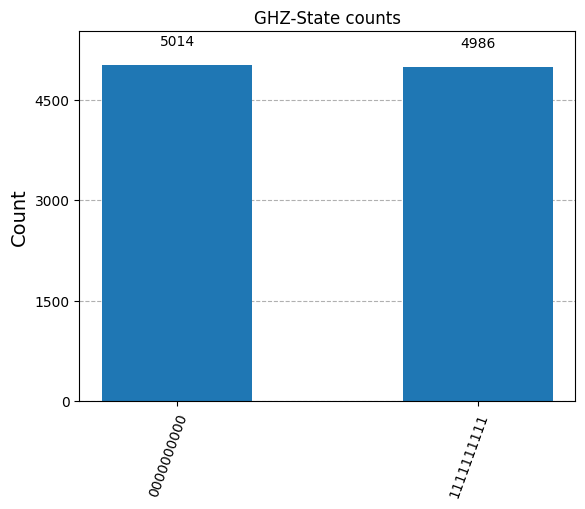

In [11]:
plot_histogram(counts, title='GHZ-State counts')